In [1]:
import tensorflow as tf
from src.dataset import dataset_tf, validation_tf, validate_on, file_mfccs, segments_from_audio_file
from src.audio import to_mfccs_dataset, to_spectrogram_dataset
from src.model import get_seq_model, get_conv_model, callbacks, get_conv_model_mini
from src.plots import plot_history, plot_mfccs, plot_spectrograms
LEARNING_RATE = 0.001

In [ ]:
trained_model_mfcc_seq = tf.keras.models.load_model("models/mfcc_seq.h5")
trained_model_mfcc_conv = tf.keras.models.load_model("models/mfcc_conv_mini.h5")
train_ds, val_ds, label_names = dataset_tf("dataset/osbh_sep_1", 0.8, 8)
train_mfccs_ds = to_mfccs_dataset(train_ds)
val_mfccs_ds = to_mfccs_dataset(val_ds)

2024-03-30 18:51:37.230906: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-03-30 18:51:37.230928: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-03-30 18:51:37.230936: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-03-30 18:51:37.230964: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-30 18:51:37.230980: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 130 files belonging to 2 classes.
Using 26 files for training.
Using 104 files for validation.
label names: ['noqueen' 'queen']
(TensorSpec(shape=(None, 4000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Example audio shape: (8, 4000)
Example label shape: (8,)
513 44100
Label: noqueen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)
513 44100
Label: queen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)
513 44100
513 44100


# Train

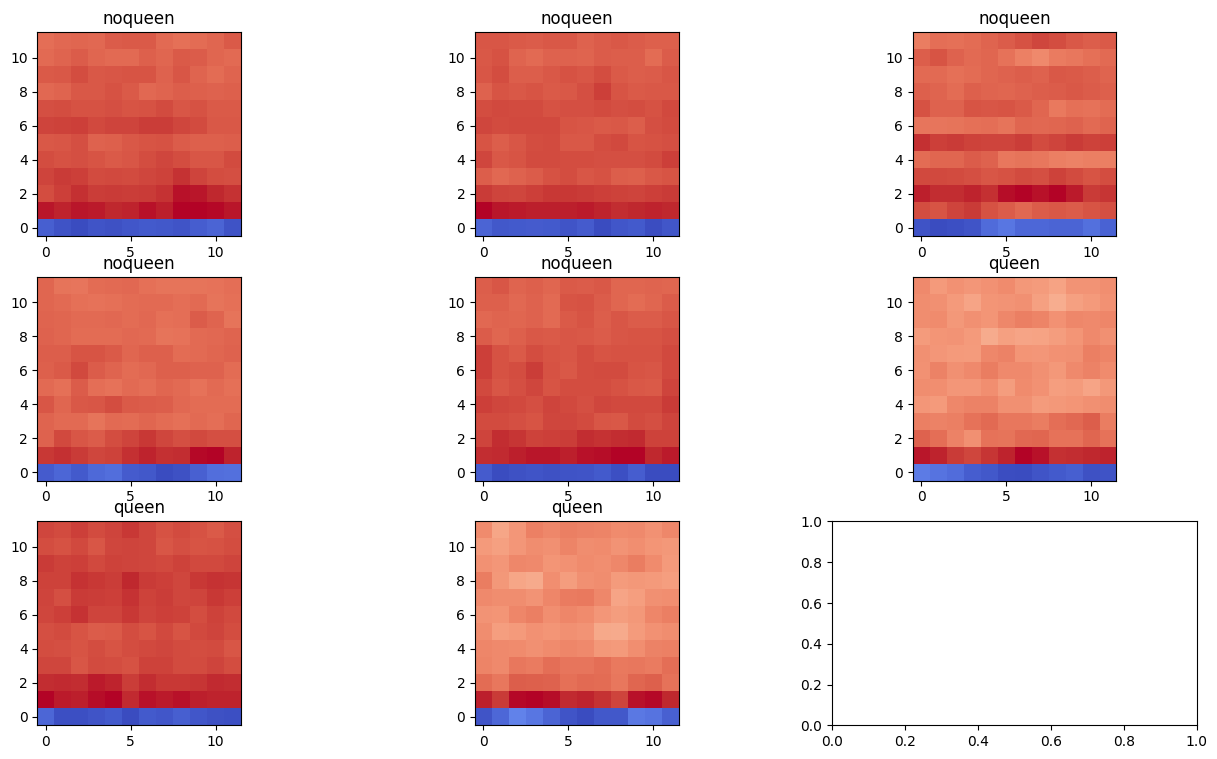

In [ ]:
for example_mfccs, example_mfccs_labels in train_mfccs_ds.take(1):
  break

plot_mfccs(example_mfccs, example_mfccs_labels, label_names)

In [ ]:
train_mfccs_ds = train_mfccs_ds.map(lambda x, y: (tf.expand_dims(x, -1), y))
val_mfccs_ds = val_mfccs_ds.map(lambda x, y: (tf.expand_dims(x, -1), y))

for example_mfccs, example_mfccs_labels in train_mfccs_ds.take(1):
  break
input_shape = example_mfccs.shape[1:]
print(input_shape)
train_mfccs_ds = train_mfccs_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)
val_mfccs_ds = val_mfccs_ds.cache().prefetch(tf.data.AUTOTUNE)

(12, 12, 1)


# EVAL

In [ ]:
results = trained_model_mfcc_seq.evaluate(val_mfccs_ds)
print(f"MFCC Seq: {results}")
results = trained_model_mfcc_conv.evaluate(val_mfccs_ds)
print(f"MFCC Conv: {results}")

 7/13 [===============>..............] - ETA: 0s - loss: 2.3012 - accuracy: 0.4107

2024-03-30 18:51:38.975763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 11ms/step - loss: 2.4815 - accuracy: 0.3558
MFCC Seq: [2.481489896774292, 0.35576921701431274]
13/13 [==============================] - 0s 4ms/step - loss: 1.6373 - accuracy: 0.3750
MFCC Conv: [1.6373347043991089, 0.375]


## Sequential

Epoch 1/10


2024-03-30 18:51:39.541333: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


4/4 [==============================] - 1s 82ms/step - loss: 1.8224 - accuracy: 0.5769 - val_loss: 1.4961 - val_accuracy: 0.4135
Epoch 2/10
4/4 [==============================] - 0s 38ms/step - loss: 2.3951 - accuracy: 0.3846 - val_loss: 1.3649 - val_accuracy: 0.5385
Epoch 3/10
4/4 [==============================] - 0s 37ms/step - loss: 2.9049 - accuracy: 0.4231 - val_loss: 1.2582 - val_accuracy: 0.5673
Epoch 4/10
4/4 [==============================] - 0s 37ms/step - loss: 2.3136 - accuracy: 0.5000 - val_loss: 0.9059 - val_accuracy: 0.5577
Epoch 5/10
4/4 [==============================] - 0s 42ms/step - loss: 1.5911 - accuracy: 0.5769 - val_loss: 1.1278 - val_accuracy: 0.4327
Epoch 6/10
4/4 [==============================] - 0s 35ms/step - loss: 1.1757 - accuracy: 0.6154 - val_loss: 1.4114 - val_accuracy: 0.3654
Epoch 7/10
4/4 [==============================] - 0s 36ms/step - loss: 1.0707 - accuracy: 0.6154 - val_loss: 1.4885 - val_accuracy: 0.3654
Epoch 8/10
4/4 [======================

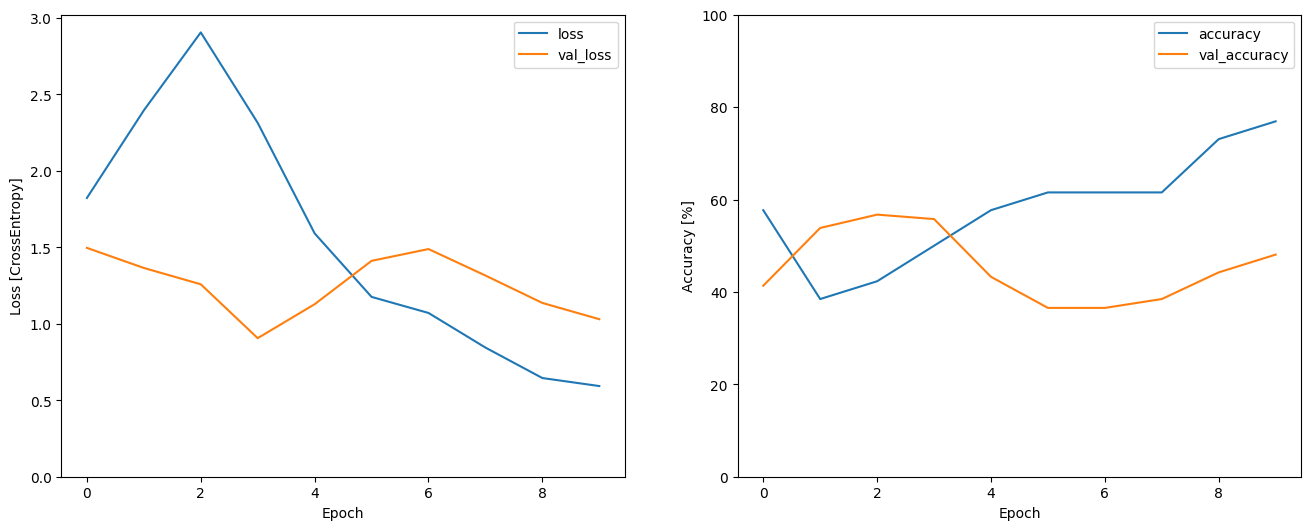

In [ ]:
trained_history_mfcc_seq = trained_model_mfcc_seq.fit(
    train_mfccs_ds, 
    validation_data=val_mfccs_ds, 
    epochs=10,
    # callbacks=callbacks
)
plot_history(trained_history_mfcc_seq)

## Convolutional

Epoch 1/10
4/4 [==============================] - 0s 43ms/step - loss: 1.0851 - accuracy: 0.5385 - val_loss: 0.9592 - val_accuracy: 0.4231
Epoch 2/10
4/4 [==============================] - 0s 18ms/step - loss: 0.8846 - accuracy: 0.5769 - val_loss: 0.7595 - val_accuracy: 0.6154
Epoch 3/10
4/4 [==============================] - 0s 17ms/step - loss: 0.9807 - accuracy: 0.5000 - val_loss: 0.7719 - val_accuracy: 0.6154
Epoch 4/10
4/4 [==============================] - 0s 17ms/step - loss: 1.0019 - accuracy: 0.5385 - val_loss: 0.6746 - val_accuracy: 0.6538
Epoch 5/10
4/4 [==============================] - 0s 18ms/step - loss: 0.7329 - accuracy: 0.5000 - val_loss: 0.6400 - val_accuracy: 0.6442
Epoch 6/10
4/4 [==============================] - 0s 17ms/step - loss: 0.6508 - accuracy: 0.6538 - val_loss: 0.6343 - val_accuracy: 0.6250
Epoch 7/10
4/4 [==============================] - 0s 17ms/step - loss: 0.6036 - accuracy: 0.6923 - val_loss: 0.6051 - val_accuracy: 0.6346
Epoch 8/10
4/4 [===========

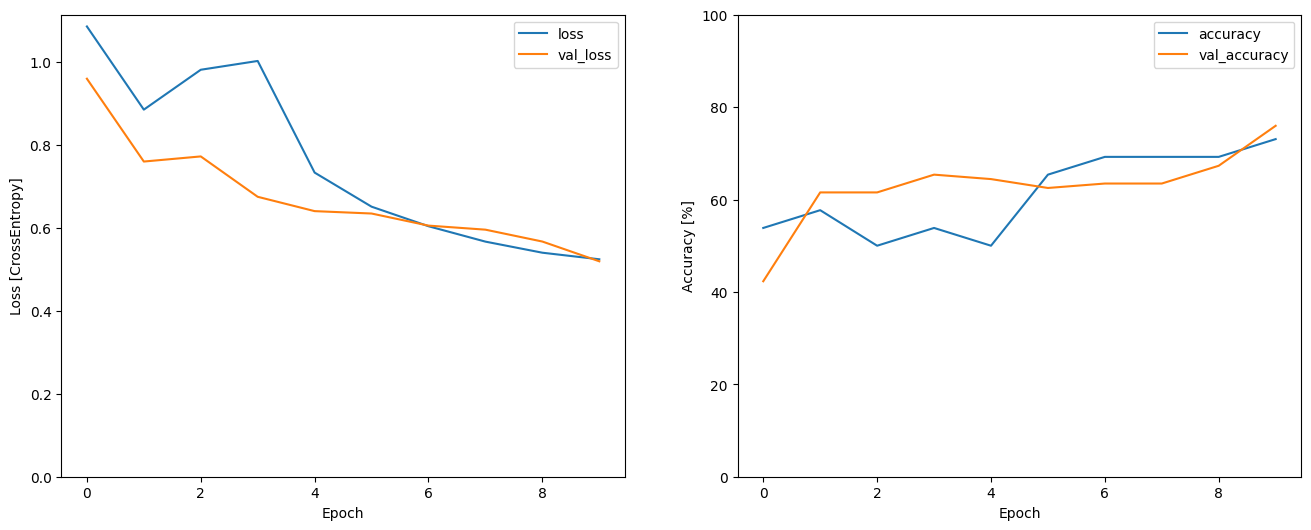

In [ ]:
trained_history_mfcc_conv = trained_model_mfcc_conv.fit(
    train_mfccs_ds, 
    validation_data=val_mfccs_ds, 
    epochs=10,
    # callbacks=callbacks
)
plot_history(trained_history_mfcc_conv)

# Summary

In [ ]:
def history_to_summary(prefix: str, history):
    print(f"{prefix}:    Loss: {history.history['loss'][-1]:.2f}, Acc: {history.history['accuracy'][-1]:.2f},   VL: {history.history['val_loss'][-1]:.2f}, VA: {history.history['val_accuracy'][-1]:.2f}" )

history_to_summary("Trained MFCCs + Seq ", trained_history_mfcc_seq)
history_to_summary("Trained MFCCs + Conv", trained_history_mfcc_conv)

Trained MFCCs + Seq :    Loss: 0.59, Acc: 0.77,   VL: 1.03, VA: 0.48
Trained MFCCs + Conv:    Loss: 0.52, Acc: 0.73,   VL: 0.52, VA: 0.76
